In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("../dataset/이자보상배율최종.csv", encoding='cp949')
backtest_2011=pd.read_csv("../년도별 주식데이터/2011년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2012=pd.read_csv("../년도별 주식데이터/2012년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2013=pd.read_csv("../년도별 주식데이터/2013년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2014=pd.read_csv("../년도별 주식데이터/2014년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2015=pd.read_csv("../년도별 주식데이터/2015년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2016=pd.read_csv("../년도별 주식데이터/2016년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2017=pd.read_csv("../년도별 주식데이터/2017년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2018=pd.read_csv("../년도별 주식데이터/2018년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2019=pd.read_csv("../년도별 주식데이터/2019년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2020=pd.read_csv("../년도별 주식데이터/2020년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_kosdak=pd.read_csv("../년도별 주식데이터/코스닥주가.csv", encoding='cp949') 

In [4]:
for i in data.index:
    data.loc[i,"회계년도"]=data.loc[i,"회계년도"].replace('-12-', '-04-')
    data.loc[i,"상장일"]=data.loc[i,"상장일"].replace('-',"")
 
data.rename(columns={'회계년도':'투자일자'},inplace=True)
data

,회사명,거래소코드,투자일자,상장일,상장폐지일,산업명,소속코드,[제조]매출액증가율,[제조]유형자산증가율,[제조]비유동자산증가율,...,[제조]기계투자효율,[제조]부가가치율,[제조]노동소득분배율,[제조]자본분배율,[제조]이윤분배율,[제조]유형자산회전율,[제조]이자보상배율(이자비용),year,month,label
0,(주)CMG제약,58820,2011-04-01,20010831,NaN,의료용 물질 및 의약품 제조업,5,56.40,-5.90,-12.89,...,128.51,19.56,89.82,10.18,-43.44,1.77,3.530000,2011,12,0
1,(주)CMG제약,58820,2012-04-01,20010831,NaN,의료용 물질 및 의약품 제조업,5,-8.43,-4.12,-16.43,...,10.67,1.66,1749.87,-1649.87,-2473.07,1.71,-7.750000,2012,12,0
2,(주)CMG제약,58820,2013-04-01,20010831,NaN,의료용 물질 및 의약품 제조업,5,25.51,16.09,77.05,...,289.40,34.29,71.28,28.72,4.23,2.03,0.700000,2013,12,0
3,(주)CMG제약,58820,2014-04-01,20010831,NaN,의료용 물질 및 의약품 제조업,5,11.52,74.30,68.15,...,132.06,31.04,79.30,20.70,2.24,1.54,3.600000,2014,12,0
4,(주)CMG제약,58820,2015-04-01,20010831,NaN,의료용 물질 및 의약품 제조업,5,18.85,-5.37,1.66,...,90.92,15.96,144.10,-44.10,-84.58,1.48,-32.220000,2015,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10647,흥구석유(주),24060,2016-04-01,19941207,NaN,도매 및 상품 중개업,5,-7.26,-5.61,0.11,...,3684.02,4.86,48.08,51.92,31.14,3.67,7.660000,2016,12,0
10648,흥구석유(주),24060,2017-04-01,19941207,NaN,도매 및 상품 중개업,5,8.12,-0.56,-0.48,...,4786.26,4.39,47.63,52.37,30.24,4.10,5.910000,2017,12,0
10649,흥구석유(주),24060,2018-04-01,19941207,NaN,도매 및 상품 중개업,5,6.87,-0.36,-2.09,...,3064.10,4.44,47.47,52.53,32.14,4.40,12.660000,2018,12,0
10650,흥구석유(주),24060,2019-04-01,19941207,NaN,도매 및 상품 중개업,5,-9.35,-7.00,-2.63,...,3489.21,10.00,22.19,77.81,55.02,4.14,252.020000,2019,12,0


In [5]:
#logit 피처선정별 종류의 피처
data_mda = data[['회사명', '거래소코드', '투자일자', '상장일', '상장폐지일', '산업명', '소속코드','[제조]1주당순이익', '[제조]총자본투자효율','[제조]부가가치', '[제조]매출액순이익률', 
                 '[제조]자기자본배율', '[제조]총자본증가율','[제조]유형자산증가율',"[제조]유동비율",'[제조]비유동자산회전률','[제조]매입채무회전률' ]]
data_logit=data[['회사명', '거래소코드', '투자일자', '상장일', '상장폐지일', '산업명', '소속코드','[제조]총자본증가율', '[제조]총자본사업이익률', '[제조]1주당매출액', 
                '[제조]비유동자산회전률', '[제조]매출채권회전률', '[제조]순운전자본회전률', '[제조]현금비율', '[제조]자기자본배율', '[제조]노동소득분배율','[제조]이자보상배율(이자비용)']]
data_lasso = data[['회사명', '거래소코드', '투자일자', '상장일', '상장폐지일', '산업명', '소속코드','[제조]비유동자산증가율','[제조]자기자본증가율','[제조]재고자산증가율','[제조]매출액순이익률',
                '[제조]매입채무회전기간','[제조]재고자산회전기간','[제조]당좌자산회전률','[제조]현금비율','[제조]순운전자본비율','[제조]자기자본배율']]
data_elastic = data[['회사명', '거래소코드', '투자일자', '상장일', '상장폐지일', '산업명', '소속코드','[제조]비유동자산증가율','[제조]자기자본증가율','[제조]재고자산증가율',
                     '[제조]매출액순이익률','[제조]매입채무회전기간','[제조]재고자산회전기간','[제조]당좌자산회전률','[제조]현금비율','[제조]순운전자본비율','[제조]자기자본배율']]
data_same = data[['회사명', '거래소코드', '투자일자', '상장일', '상장폐지일', '산업명', '소속코드','[제조]노동소득분배율','[제조]자기자본배율','[제조]현금비율','[제조]자기자본증가율',
                  '[제조]총자본증가율','[제조]재고자산증가율','[제조]매출액순이익률','[제조]매입채무회전기간','[제조]재고자산회전기간','[제조]순운전자본회전률']]

In [6]:
# 투자 조건에 맞는 기업들을 오름차순 정렬
data_logit =data_logit.sort_values("[제조]자기자본배율", ascending=False)
data_logit 

,회사명,거래소코드,투자일자,상장일,상장폐지일,산업명,소속코드,[제조]총자본증가율,[제조]총자본사업이익률,[제조]1주당매출액,[제조]비유동자산회전률,[제조]매출채권회전률,[제조]순운전자본회전률,[제조]현금비율,[제조]자기자본배율,[제조]노동소득분배율,[제조]이자보상배율(이자비용)
10122,코오롱티슈진(주),950160,2017-04-01,20171106,NaN,의료용 물질 및 의약품 제조업,6,355.96,-20.88,299.04,1.01,4.45,0.02,221.58,6266409.71,0.00,-53.75
10123,코오롱티슈진(주),950160,2018-04-01,20171106,NaN,의료용 물질 및 의약품 제조업,6,-14.49,-17.02,310.08,0.67,5.98,0.02,157.00,5122701.68,0.00,-31.45
10124,코오롱티슈진(주),950160,2019-04-01,20171106,NaN,의료용 물질 및 의약품 제조업,6,-24.35,-29.12,247.81,0.31,3.97,0.02,325.12,3367945.79,0.00,-37.79
10125,코오롱티슈진(주),950160,2020-04-01,20171106,NaN,의료용 물질 및 의약품 제조업,6,-41.60,-41.24,288.13,0.33,4.52,0.03,121.88,1843173.37,0.00,-49.75
8915,애머릿지코퍼레이션,900100,2012-04-01,20100421,NaN,자동차 및 부품 판매업,6,-9.13,0.40,13292.41,6.24,9.03,1.44,16.79,57900.40,82.96,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9351,오성첨단소재(주),52420,2013-04-01,20010807,NaN,기타 기계 및 장비 제조업,5,-27.20,-9.23,4901.62,0.74,8.15,0.57,1.93,-497.28,0.00,-1.04
4326,(주)우전,52270,2016-04-01,20010605,2017-04-13,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",4,-53.02,-20.35,4023.14,0.89,6.30,0.58,7.96,-674.64,0.00,-6.43
8749,쌍용건설(주),12650,2013-04-01,19930128,2014-04-11,종합 건설업,4,-31.22,-15.28,85682.78,4.36,9.55,0.84,7.27,-743.44,0.00,-4.45
9993,참존글로벌(주),158310,2020-04-01,20130403,NaN,기타 기계 및 장비 제조업,6,-69.11,-6.37,101.39,0.06,0.33,0.01,7.39,-1008.03,0.00,-0.17


In [7]:
# 년도별로 분류
data_logit_2011 = data_logit[data_logit["투자일자"]=='2011-04-01']
data_logit_2012 = data_logit[data_logit["투자일자"]=='2012-04-01']
data_logit_2012["투자일자"] = "2012-04-02"
data_logit_2013 = data_logit[data_logit["투자일자"]=='2013-04-01']
data_logit_2014 = data_logit[data_logit["투자일자"]=='2014-04-01']
data_logit_2015 = data_logit[data_logit["투자일자"]=='2015-04-01']
data_logit_2016 = data_logit[data_logit["투자일자"]=='2016-04-01']
data_logit_2017 = data_logit[data_logit["투자일자"]=='2017-04-01']
data_logit_2017["투자일자"] = "2017-04-03"
data_logit_2018 = data_logit[data_logit["투자일자"]=='2018-04-01']
data_logit_2018["투자일자"] = "2018-04-02"
data_logit_2019 = data_logit[data_logit["투자일자"]=='2019-04-01']
data_logit_2020 = data_logit[data_logit["투자일자"]=='2020-04-01']


c:\Users\김성휘\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\Users\김성휘\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
c:\Users\김성휘\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying 

In [8]:
data_logit_2011_buy=data_logit_2011[data_logit_2011["상장일"]<='20110401']
data_logit_2012_buy=data_logit_2012[data_logit_2012["상장일"]<='20120401']
data_logit_2013_buy=data_logit_2013[data_logit_2013["상장일"]<='20130401']
data_logit_2014_buy=data_logit_2014[data_logit_2014["상장일"]<='20140401']
data_logit_2015_buy=data_logit_2015[data_logit_2015["상장일"]<='20150401']
data_logit_2016_buy=data_logit_2016[data_logit_2016["상장일"]<='20160401']
data_logit_2017_buy=data_logit_2017[data_logit_2017["상장일"]<='20170401']
data_logit_2018_buy=data_logit_2018[data_logit_2018["상장일"]<='20180401']
data_logit_2019_buy=data_logit_2019[data_logit_2019["상장일"]<='20190401']
data_logit_2020_buy=data_logit_2020[data_logit_2020["상장일"]<='20200401']


In [9]:
# 해당기업 순위 20위 추출
data_logit_2011_buy=data_logit_2011_buy[:20]
data_logit_2012_buy=data_logit_2012_buy[:20]
data_logit_2013_buy=data_logit_2013_buy[:20]
data_logit_2014_buy=data_logit_2014_buy[:20]
data_logit_2015_buy=data_logit_2015_buy[:20]
data_logit_2016_buy=data_logit_2016_buy[:20]
data_logit_2017_buy=data_logit_2017_buy[:20]
data_logit_2018_buy=data_logit_2018_buy[:20]
data_logit_2019_buy=data_logit_2019_buy[:20]
data_logit_2020_buy=data_logit_2020_buy[:20]

In [10]:
#트레이드 조건 주기
data_logit_2011_buy["trade"]="buy"
data_logit_2012_buy["trade"]="buy"
data_logit_2013_buy["trade"]="buy"
data_logit_2014_buy["trade"]="buy"
data_logit_2015_buy["trade"]="buy"
data_logit_2016_buy["trade"]="buy"
data_logit_2017_buy["trade"]="buy"
data_logit_2018_buy["trade"]="buy"
data_logit_2019_buy["trade"]="buy"
data_logit_2020_buy["trade"]="buy"

In [11]:
stock_2011 = pd.merge(backtest_2011,data_logit_2011_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2012 = pd.merge(backtest_2012,data_logit_2012_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2013 = pd.merge(backtest_2013,data_logit_2013_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2014 = pd.merge(backtest_2014,data_logit_2014_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2015 = pd.merge(backtest_2015,data_logit_2015_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2016 = pd.merge(backtest_2016,data_logit_2016_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2017 = pd.merge(backtest_2017,data_logit_2017_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2018 = pd.merge(backtest_2018,data_logit_2018_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2019 = pd.merge(backtest_2019,data_logit_2019_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2020 = pd.merge(backtest_2020,data_logit_2020_buy, how='left',on=['회사명','투자일자','거래소코드'])

In [12]:
stock_2011[stock_2011["trade"]=="buy"]

,index,회사명,거래소코드,투자일자,종가,일일수익률,상장일,상장폐지일,산업명,소속코드,...,[제조]총자본사업이익률,[제조]1주당매출액,[제조]비유동자산회전률,[제조]매출채권회전률,[제조]순운전자본회전률,[제조]현금비율,[제조]자기자본배율,[제조]노동소득분배율,[제조]이자보상배율(이자비용),trade
5962,53854,(주)네오위즈홀딩스,42420,2011-04-01,12700,-0.003922,20000627,NaN,전문 서비스업,5.0,...,18.43,79418.79,1.91,7.76,1.44,56.97,3443.61,47.36,29.73,buy
44513,53429,(주)선광,3100,2011-04-01,15450,-0.003226,19991221,NaN,창고 및 운송관련 서비스업,5.0,...,21.68,20068.51,0.41,4.02,0.96,41.18,4485.80,18.85,25.47,buy
60228,53154,(주)아이디스홀딩스,54800,2011-04-01,13031,0.015350,20010927,NaN,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",5.0,...,4.07,1964.94,0.19,3.26,0.13,2.93,3995.41,33.46,3.79,buy
70473,53197,(주)에스에프에이,56190,2011-04-01,34500,0.008772,20011218,NaN,기타 기계 및 장비 제조업,5.0,...,20.05,43524.28,5.87,6.82,1.23,44.63,3969.04,44.82,758.19,buy
96654,53518,(주)위메이드,112040,2011-04-01,8133,0.000000,20091218,NaN,출판업,5.0,...,7.25,13789.48,0.91,4.06,0.45,196.19,6022.24,62.90,349.28,buy
109646,53775,(주)인터플렉스,51370,2011-04-01,28695,0.017445,20030122,NaN,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",5.0,...,9.94,37032.22,2.91,4.26,1.10,10.30,3581.36,31.93,9.73,buy
138723,53341,(주)태웅,44490,2011-04-01,46024,0.009653,20011108,NaN,금속가공제품 제조업; 기계 및 가구 제외,5.0,...,3.32,28937.58,1.82,4.82,0.86,19.70,5488.70,27.59,12.14,buy
156860,53823,(주)한국가구,4590,2011-04-01,1110,0.000000,19930603,NaN,가구 제조업,5.0,...,5.17,25991.73,0.85,5.43,1.00,42.10,3907.93,42.03,4.97,buy
162769,53496,(주)휴맥스,115160,2011-04-01,13192,0.007023,20091116,NaN,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",5.0,...,5.48,43433.44,5.85,3.96,1.03,20.63,3456.30,32.75,0.60,buy
163019,53703,(주)휴맥스홀딩스,28080,2011-04-01,7370,0.001359,19970416,NaN,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",5.0,...,5.81,1498.07,0.09,4.26,0.55,401.40,3465.89,14.87,35.65,buy


In [13]:
list =[stock_2011,stock_2012,stock_2013,stock_2014,stock_2015,stock_2016,stock_2017,stock_2018,stock_2019,stock_2020]
list_grn =[stock_2011,stock_2012,stock_2013,stock_2014,stock_2015,stock_2016,stock_2017,stock_2018,stock_2019,stock_2020]


In [14]:
for i in range(len(list)):
    for j in list[i].index:
        if j>0:
            if list[i].loc[j-1,"trade"] == "buy":
                list[i].loc[j,"trade"] = "hold"
            elif  list[i].loc[j-1,"trade"] == "hold":
                if list[i].iloc[:,1][j] == list[i].iloc[:,1][j-1]:
                    list[i].loc[j,"trade"] = "hold"
                elif list[i].iloc[:,1][j] != list[i].iloc[:,1][j-1]:
                    list[i].loc[j-1,"trade"] = "sell"
                if j== list[i].tail(n=1).index:
                    list[i].loc[j,"trade"] = "sell"
                        
for i in range(len(list)):
    list[i] = list[i][["회사명","거래소코드","투자일자","종가","일일수익률","trade"]]
    list[i] = list[i].dropna()
    list[i] = list[i].sort_values('투자일자', ascending=True)
    list[i] = list[i].reset_index(drop='index')
    list[i] = list[i].groupby("투자일자")["일일수익률"].sum()/20

In [15]:
# acc_rtn2= 1
# for i in range(len(list)):
#     list[i]=list[i].reset_index()
#     for j in list[i].index:
        
#         list[i].loc[j,"연누적수익률"] = acc_rtn2*list[i].loc[j,"일일수익률"]
#         acc_rtn2 = list[i].loc[j,"연누적수익률"]

In [16]:
# list[1]

In [17]:
#각 년도별 수익률 합치기
rtn =pd.concat(list)
rtn = pd.DataFrame(rtn)

In [18]:
#리밸런싱 날짜는 수익률 반영을 못하므로 제거
rtn["일일수익률"] =rtn["일일수익률"]*100
rtn =rtn.drop(index=["2011-04-01","2012-04-02","2013-04-01","2014-04-01","2015-04-01","2016-04-01","2017-04-03","2018-04-02","2019-04-01","2020-04-01"])
stock_rtn=rtn.reset_index()

In [19]:
stock_rtn=rtn.reset_index()
stock_rtn.columns=["투자일자","일일수익률(%)"]
stock_rtn["일일수익률"] =(stock_rtn["일일수익률(%)"]/100) +1
stock_rtn

,투자일자,일일수익률(%),일일수익률
0,2011-04-04,0.136429,1.001364
1,2011-04-05,0.499430,1.004994
2,2011-04-06,-0.191073,0.998089
3,2011-04-07,-0.811329,0.991887
4,2011-04-08,1.802593,1.018026
...,...,...,...
2448,2021-03-25,0.207581,1.002076
2449,2021-03-26,0.748520,1.007485
2450,2021-03-29,0.581643,1.005816
2451,2021-03-30,0.085812,1.000858


In [20]:
# stock_rtn[stock_rtn["투자일자"]=='2012-03-30']248
# stock_rtn[stock_rtn["투자일자"]=='2013-03-29'] 494
# stock_rtn[stock_rtn["투자일자"]=='2014-03-31'] 740
# stock_rtn[stock_rtn["투자일자"]=='2015-03-31'] 983
# stock_rtn[stock_rtn["투자일자"]=='2016-03-31'] 1230
# stock_rtn[stock_rtn["투자일자"]=='2017-03-31'] 1477
# stock_rtn[stock_rtn["투자일자"]=='2018-03-30'] 1718
# stock_rtn[stock_rtn["투자일자"]=='2019-03-29'] 1959
# stock_rtn[stock_rtn["투자일자"]=='2020-03-31'] 2207
# stock_rtn[stock_rtn["투자일자"]=='2021-03-31'] 2452


In [21]:
acc_rtn=1
for i in stock_rtn.index:
    
    stock_rtn.loc[i,"누적수익률"] = acc_rtn*stock_rtn.loc[i,"일일수익률"]
    acc_rtn = stock_rtn.loc[i,"누적수익률"]
        

acc_rtn_1 = 1
for i in stock_rtn.index:
    if i <= 248:
        
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_1*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_1 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 1
        
acc_rtn_2 = 1
for i in stock_rtn.index:
    if 248 < i <= 494:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_2*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_2 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 2
        
acc_rtn_3 = 1        
for i in stock_rtn.index:
    if  494< i <=740:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_3*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_3 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 3
        
acc_rtn_4 = 1       
for i in stock_rtn.index:
    if 740 < i <= 983:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_4*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_4 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 4
        
acc_rtn_5 = 1       
for i in stock_rtn.index:
    if  983< i <= 1230:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_5*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_5 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 5

acc_rtn_6 = 1
for i in stock_rtn.index:
    if 1230 < i <= 1477:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_6*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_6 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 6
        
acc_rtn_7 = 1
for i in stock_rtn.index:
    if 1477 < i <= 1718:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_7*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_7 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 7

acc_rtn_8 = 1
for i in stock_rtn.index:
    if 1718 < i <= 1959:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_8*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_8 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 8   
             
acc_rtn_9 = 1      
for i in stock_rtn.index:
    if 1959 < i <= 2207:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_9*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_9 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 9
        
acc_rtn_10 = 1       
for i in stock_rtn.index:
    if 2207 < i <= 2452:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_10*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_10 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 10
    

In [22]:
#코스닥 시작 데이터 61
# backtest_kosdak[backtest_kosdak["날짜"]=="2011-04-04"]
#코스닥 마지막 데이터 2522
#backtest_kosdak[backtest_kosdak["날짜"]=="2021-03-31"]

In [23]:
#코스닥 데이터 끌고오기
backtest_kosdak_buy= backtest_kosdak[61:2523]
backtest_kosdak_rtn = backtest_kosdak_buy.set_index("날짜")

In [24]:
backtest_kosdak_rtn =backtest_kosdak_rtn.drop(index=["2012-04-02","2013-04-01","2014-04-01","2015-04-01","2016-04-01","2017-04-03","2018-04-02","2019-04-01","2020-04-01"])
backtest_kosdak_rtn=backtest_kosdak_rtn.reset_index()

In [25]:
backtest_kosdak_rtn.columns = ["투자일자","코스닥종가","시가총액","코스닥수익률","코스닥시총수익률"]

In [26]:
#주식수익률과 코스닥 merge
stock_rtn_all = pd.merge(stock_rtn,backtest_kosdak_rtn,how="left",on="투자일자")


In [27]:
stock_rtn_all["코스닥수익률"]=stock_rtn_all["코스닥수익률"]*100


In [28]:
stock_rtn_all

,투자일자,일일수익률(%),일일수익률,누적수익률,연누적수익률,투자연차,코스닥종가,시가총액,코스닥수익률,코스닥시총수익률
0,2011-04-04,0.136429,1.001364,1.001364,1.001364,1.0,534.90,105835314871792,0.533774,0.005763
1,2011-04-05,0.499430,1.004994,1.006365,1.006365,1.0,537.66,106138352312272,0.515984,0.002863
2,2011-04-06,-0.191073,0.998089,1.004443,1.004443,1.0,533.98,105387016008919,-0.684447,-0.007079
3,2011-04-07,-0.811329,0.991887,0.996293,0.996293,1.0,534.97,105571037939827,0.185400,0.001746
4,2011-04-08,1.802593,1.018026,1.014252,1.014252,1.0,534.20,105439281631189,-0.143933,-0.001248
...,...,...,...,...,...,...,...,...,...,...
2448,2021-03-25,0.207581,1.002076,3.373555,1.760005,10.0,954.99,387311921085308,0.122665,0.001147
2449,2021-03-26,0.748520,1.007485,3.398807,1.773179,10.0,956.70,388051677647507,0.179059,0.001910
2450,2021-03-29,0.581643,1.005816,3.418576,1.783492,10.0,954.10,386977420485060,-0.271768,-0.002768
2451,2021-03-30,0.085812,1.000858,3.421509,1.785023,10.0,958.06,388660278311558,0.415051,0.004349


In [29]:

stock_rtn_all["코스닥수익률(%)"]= stock_rtn_all["코스닥수익률"]
stock_rtn_all["코스닥일일수익률"] =(stock_rtn_all["코스닥수익률(%)"]/100) +1
stock_rtn_all

,투자일자,일일수익률(%),일일수익률,누적수익률,연누적수익률,투자연차,코스닥종가,시가총액,코스닥수익률,코스닥시총수익률,코스닥수익률(%),코스닥일일수익률
0,2011-04-04,0.136429,1.001364,1.001364,1.001364,1.0,534.90,105835314871792,0.533774,0.005763,0.533774,1.005338
1,2011-04-05,0.499430,1.004994,1.006365,1.006365,1.0,537.66,106138352312272,0.515984,0.002863,0.515984,1.005160
2,2011-04-06,-0.191073,0.998089,1.004443,1.004443,1.0,533.98,105387016008919,-0.684447,-0.007079,-0.684447,0.993156
3,2011-04-07,-0.811329,0.991887,0.996293,0.996293,1.0,534.97,105571037939827,0.185400,0.001746,0.185400,1.001854
4,2011-04-08,1.802593,1.018026,1.014252,1.014252,1.0,534.20,105439281631189,-0.143933,-0.001248,-0.143933,0.998561
...,...,...,...,...,...,...,...,...,...,...,...,...
2448,2021-03-25,0.207581,1.002076,3.373555,1.760005,10.0,954.99,387311921085308,0.122665,0.001147,0.122665,1.001227
2449,2021-03-26,0.748520,1.007485,3.398807,1.773179,10.0,956.70,388051677647507,0.179059,0.001910,0.179059,1.001791
2450,2021-03-29,0.581643,1.005816,3.418576,1.783492,10.0,954.10,386977420485060,-0.271768,-0.002768,-0.271768,0.997282
2451,2021-03-30,0.085812,1.000858,3.421509,1.785023,10.0,958.06,388660278311558,0.415051,0.004349,0.415051,1.004151


In [30]:
acc_rtn=1
for i in stock_rtn_all.index:
    
    stock_rtn_all.loc[i,'코스닥누적수익률'] = acc_rtn*stock_rtn_all.loc[i,"코스닥일일수익률"]
    acc_rtn = stock_rtn_all.loc[i,"코스닥누적수익률"]
    
    
stock_rtn_all

,투자일자,일일수익률(%),일일수익률,누적수익률,연누적수익률,투자연차,코스닥종가,시가총액,코스닥수익률,코스닥시총수익률,코스닥수익률(%),코스닥일일수익률,코스닥누적수익률
0,2011-04-04,0.136429,1.001364,1.001364,1.001364,1.0,534.90,105835314871792,0.533774,0.005763,0.533774,1.005338,1.005338
1,2011-04-05,0.499430,1.004994,1.006365,1.006365,1.0,537.66,106138352312272,0.515984,0.002863,0.515984,1.005160,1.010525
2,2011-04-06,-0.191073,0.998089,1.004443,1.004443,1.0,533.98,105387016008919,-0.684447,-0.007079,-0.684447,0.993156,1.003609
3,2011-04-07,-0.811329,0.991887,0.996293,0.996293,1.0,534.97,105571037939827,0.185400,0.001746,0.185400,1.001854,1.005469
4,2011-04-08,1.802593,1.018026,1.014252,1.014252,1.0,534.20,105439281631189,-0.143933,-0.001248,-0.143933,0.998561,1.004022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448,2021-03-25,0.207581,1.002076,3.373555,1.760005,10.0,954.99,387311921085308,0.122665,0.001147,0.122665,1.001227,1.777700
2449,2021-03-26,0.748520,1.007485,3.398807,1.773179,10.0,956.70,388051677647507,0.179059,0.001910,0.179059,1.001791,1.780883
2450,2021-03-29,0.581643,1.005816,3.418576,1.783492,10.0,954.10,386977420485060,-0.271768,-0.002768,-0.271768,0.997282,1.776043
2451,2021-03-30,0.085812,1.000858,3.421509,1.785023,10.0,958.06,388660278311558,0.415051,0.004349,0.415051,1.004151,1.783415


In [31]:

for i in stock_rtn_all.index:
    if stock_rtn_all.iloc[:,5][i] == 1:
        stock_rtn_all.loc[i,"코스닥연누적수익률"] = stock_rtn_all.loc[i,"코스닥누적수익률"]
        
    elif stock_rtn_all.iloc[:,5][i] != 1:
        if stock_rtn_all.iloc[:,5][i] == stock_rtn_all.iloc[:,5][i-1]:
            stock_rtn_all.loc[i,"코스닥연누적수익률"] = stock_rtn_all.loc[i-1,"코스닥연누적수익률"]*stock_rtn_all.loc[i,"코스닥일일수익률"]
            
        elif stock_rtn_all.iloc[:,5][i] != stock_rtn_all.iloc[:,5][i-1]:
            stock_rtn_all.loc[i,"코스닥연누적수익률"] = stock_rtn_all.loc[i,"코스닥일일수익률"]
            
                

    

In [32]:
stock_rtn_all.iloc[:,5]

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
2448    10.0
2449    10.0
2450    10.0
2451    10.0
2452    10.0
Name: 투자연차, Length: 2453, dtype: float64

In [33]:
stock_rtn_all[490:505]

,투자일자,일일수익률(%),일일수익률,누적수익률,연누적수익률,투자연차,코스닥종가,시가총액,코스닥수익률,코스닥시총수익률,코스닥수익률(%),코스닥일일수익률,코스닥누적수익률,코스닥연누적수익률
490,2013-03-25,-0.720399,0.992796,1.191907,1.178006,2.0,549.56,122836307769308,-0.306576,-0.002275,-0.306576,0.996934,1.028457,1.053200
491,2013-03-26,1.725959,1.017260,1.212479,1.198338,2.0,549.90,122920014052292,0.061868,0.000681,0.061868,1.000619,1.029093,1.053852
492,2013-03-27,-0.117569,0.998824,1.211053,1.196929,2.0,548.72,122659767622917,-0.214584,-0.002117,-0.214584,0.997854,1.026885,1.051591
493,2013-03-28,0.325449,1.003254,1.214995,1.200825,2.0,552.64,123537571806713,0.714390,0.007156,0.714390,1.007144,1.034221,1.059103
494,2013-03-29,-0.880819,0.991192,1.204293,1.190248,2.0,555.02,124020587600936,0.430660,0.003910,0.430660,1.004307,1.038675,1.063664
495,2013-04-02,0.468821,1.004688,1.209939,1.004688,3.0,552.83,123545583208574,-0.205787,-0.002124,-0.205787,0.997942,1.036537,0.997942
496,2013-04-03,0.179643,1.001796,1.212112,1.006493,3.0,557.96,124727364942628,0.927953,0.009566,0.927953,1.009280,1.046156,1.007203
497,2013-04-04,-0.906497,0.990935,1.201125,0.997369,3.0,555.23,124124104831224,-0.489282,-0.004837,-0.489282,0.995107,1.041037,1.002274
498,2013-04-05,-1.420856,0.985791,1.184058,0.983198,3.0,547.51,122387758967786,-1.390415,-0.013989,-1.390415,0.986096,1.026563,0.988339
499,2013-04-08,-2.922652,0.970773,1.149452,0.954463,3.0,528.78,118098161236530,-3.420942,-0.035049,-3.420942,0.965791,0.991445,0.954528


In [34]:
stock_rtn_all["코스닥연누적수익률(%)"]=(stock_rtn_all["코스닥연누적수익률"]-1)*100
stock_rtn_all["누적수익률(%)"]= (stock_rtn_all["누적수익률"]-1)*100
stock_rtn_all["코스닥누적수익률(%)"]= (stock_rtn_all["코스닥누적수익률"]-1)*100
stock_rtn_all["연누적수익률(%)"]= (stock_rtn_all["연누적수익률"]-1)*100


In [35]:
stock_rtn_all =stock_rtn_all[['투자일자', '일일수익률(%)',"누적수익률(%)","연누적수익률(%)", '코스닥종가', '코스닥수익률(%)', '코스닥누적수익률(%)',"코스닥연누적수익률(%)",'투자연차']]


In [36]:
stock_rtn_all

,투자일자,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
0,2011-04-04,0.136429,0.136429,0.136429,534.90,0.533774,0.533774,0.533774,1.0
1,2011-04-05,0.499430,0.636540,0.636540,537.66,0.515984,1.052513,1.052513,1.0
2,2011-04-06,-0.191073,0.444252,0.444252,533.98,-0.684447,0.360862,0.360862,1.0
3,2011-04-07,-0.811329,-0.370682,-0.370682,534.97,0.185400,0.546931,0.546931,1.0
4,2011-04-08,1.802593,1.425229,1.425229,534.20,-0.143933,0.402210,0.402210,1.0
...,...,...,...,...,...,...,...,...,...
2448,2021-03-25,0.207581,237.355491,76.000489,954.99,0.122665,77.769983,73.055596,10.0
2449,2021-03-26,0.748520,239.880663,77.317887,956.70,0.179059,78.088297,73.365468,10.0
2450,2021-03-29,0.581643,241.857555,78.349244,954.10,-0.271768,77.604311,72.894317,10.0
2451,2021-03-30,0.085812,242.150910,78.502289,958.06,0.415051,78.341459,73.611916,10.0


In [37]:
((100+stock_rtn_all["누적수익률(%)"].min())-(100+stock_rtn_all["누적수익률(%)"].max()))/(stock_rtn_all["누적수익률(%)"].max()+100)

-0.7767676775435567

In [38]:
# 전략누적수익률의 표준편차를 계산한다
Std = (stock_rtn_all["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( stock_rtn_all["일일수익률(%)"] - stock_rtn_all["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print( 'Sharpe ratio: %.2f' % Sharpe )

Sharpe ratio: 0.02


In [39]:
Sharpe *np.sqrt(252)

0.31094944619982584

In [40]:
#mdd 
((100+stock_rtn_all["누적수익률(%)"].min())-(100+stock_rtn_all["누적수익률(%)"].max()))/(stock_rtn_all["누적수익률(%)"].max()+100)

-0.7767676775435567

In [41]:
Std

1.2999121327531562

In [42]:
cagr = (stock_rtn_all
        ["누적수익률(%)"]**(1/10))-1
print(cagr*100)


0      -18.061011
1       -4.416573
2       -7.793213
3             NaN
4        3.606848
          ...    
2448    72.798484
2449    72.981446
2450    73.123477
2451    73.144464
2452    73.007531
Name: 누적수익률(%), Length: 2453, dtype: float64


In [43]:
stock_rtn_all=stock_rtn_all.set_index('투자일자')

In [44]:
rtn_2011 = stock_rtn_all[stock_rtn_all["투자연차"]==1]
rtn_2012 = stock_rtn_all[stock_rtn_all["투자연차"]==2]
rtn_2013 = stock_rtn_all[stock_rtn_all["투자연차"]==3]
rtn_2014 = stock_rtn_all[stock_rtn_all["투자연차"]==4]
rtn_2015 = stock_rtn_all[stock_rtn_all["투자연차"]==5]
rtn_2016 = stock_rtn_all[stock_rtn_all["투자연차"]==6]
rtn_2017 = stock_rtn_all[stock_rtn_all["투자연차"]==7]
rtn_2018 = stock_rtn_all[stock_rtn_all["투자연차"]==8]
rtn_2019 = stock_rtn_all[stock_rtn_all["투자연차"]==9]
rtn_2020 = stock_rtn_all[stock_rtn_all["투자연차"]==10]

In [45]:
rtn_2011

,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2011-04-04,0.136429,0.136429,0.136429,534.90,0.533774,0.533774,0.533774,1.0
2011-04-05,0.499430,0.636540,0.636540,537.66,0.515984,1.052513,1.052513,1.0
2011-04-06,-0.191073,0.444252,0.444252,533.98,-0.684447,0.360862,0.360862,1.0
2011-04-07,-0.811329,-0.370682,-0.370682,534.97,0.185400,0.546931,0.546931,1.0
2011-04-08,1.802593,1.425229,1.425229,534.20,-0.143933,0.402210,0.402210,1.0
...,...,...,...,...,...,...,...,...
2012-03-26,-1.168692,1.653742,1.653742,523.39,-0.773504,-1.629515,-1.629515,1.0
2012-03-27,1.108447,2.780519,2.780519,521.74,-0.315252,-1.939631,-1.939631,1.0
2012-03-28,-0.873583,1.882646,1.882646,519.56,-0.417833,-2.349359,-2.349359,1.0


In [46]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2011["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2011["일일수익률(%)"] - rtn_2011["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2011["누적수익률(%)"].min())-(100+rtn_2011["누적수익률(%)"].max()))/(rtn_2011["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2011


-0.29371467515562266
1.748683469598004
Sharpe ratio: 0.01
0.13022721117577526


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2011-04-04,0.136429,0.136429,0.136429,534.90,0.533774,0.533774,0.533774,1.0
2011-04-05,0.499430,0.636540,0.636540,537.66,0.515984,1.052513,1.052513,1.0
2011-04-06,-0.191073,0.444252,0.444252,533.98,-0.684447,0.360862,0.360862,1.0
2011-04-07,-0.811329,-0.370682,-0.370682,534.97,0.185400,0.546931,0.546931,1.0
2011-04-08,1.802593,1.425229,1.425229,534.20,-0.143933,0.402210,0.402210,1.0
...,...,...,...,...,...,...,...,...
2012-03-26,-1.168692,1.653742,1.653742,523.39,-0.773504,-1.629515,-1.629515,1.0
2012-03-27,1.108447,2.780519,2.780519,521.74,-0.315252,-1.939631,-1.939631,1.0
2012-03-28,-0.873583,1.882646,1.882646,519.56,-0.417833,-2.349359,-2.349359,1.0


In [47]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2012["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2012["일일수익률(%)"] - rtn_2012["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2012["누적수익률(%)"].min())-(100+rtn_2012["누적수익률(%)"].max()))/(rtn_2012["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2012


-0.2731674908680749
0.9534881918530306
Sharpe ratio: 0.05
0.7443674549963655


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2012-04-03,-0.383805,0.791672,-0.383805,515.83,-1.144117,-3.466596,-1.144117,2.0
2012-04-04,-1.620841,-0.842000,-1.998425,502.97,-2.493069,-5.873241,-3.608662,2.0
2012-04-05,0.346619,-0.498300,-1.658733,503.34,0.073563,-5.803998,-3.537754,2.0
2012-04-06,0.293413,-0.206348,-1.370187,503.41,0.013907,-5.790899,-3.524339,2.0
2012-04-09,-2.248845,-2.450553,-3.588219,486.80,-3.299497,-8.899325,-6.707551,2.0
...,...,...,...,...,...,...,...,...
2013-03-25,-0.720399,19.190699,17.800643,549.56,-0.306576,2.845700,5.320046,2.0
2013-03-26,1.725959,21.247881,19.833834,549.90,0.061868,2.909328,5.385205,2.0
2013-03-27,-0.117569,21.105331,19.692946,548.72,-0.214584,2.688501,5.159065,2.0


In [48]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2013["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2013["일일수익률(%)"] - rtn_2013["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2013["누적수익률(%)"].min())-(100+rtn_2013["누적수익률(%)"].max()))/(rtn_2013["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2013


-0.1897101805255888
1.040661017723645
Sharpe ratio: -0.00
-0.07660723483023656


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2013-04-02,0.468821,20.993873,0.468821,552.83,-0.205787,3.653749,-0.205787,3.0
2013-04-03,0.179643,21.211231,0.649306,557.96,0.927953,4.615606,0.720256,3.0
2013-04-04,-0.906497,20.112454,-0.263077,555.23,-0.489282,4.103740,0.227449,3.0
2013-04-05,-1.420856,18.405829,-1.680195,547.51,-1.390415,2.656267,-1.166128,3.0
2013-04-08,-2.922652,14.945239,-4.553740,528.78,-3.420942,-0.855545,-4.547178,3.0
...,...,...,...,...,...,...,...,...
2014-03-25,-0.698101,16.262501,-3.459935,539.05,-1.200513,1.070045,-2.693287,3.0
2014-03-26,0.258688,16.563258,-3.210197,544.13,0.942399,2.022528,-1.776269,3.0
2014-03-27,-0.298405,16.215428,-3.499023,541.46,-0.490692,1.521912,-2.258245,3.0


In [49]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2014["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2014["일일수익률(%)"] - rtn_2014["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2014["누적수익률(%)"].min())-(100+rtn_2014["누적수익률(%)"].max()))/(rtn_2014["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2014


-0.37262594991584713
0.9858694047659817
Sharpe ratio: 0.12
1.9705422567998143


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2014-04-02,2.296086,18.960266,2.296086,557.65,1.560793,3.129309,1.560793,4.0
2014-04-03,0.907548,20.039888,3.224473,557.01,-0.114767,3.010951,1.444234,4.0
2014-04-04,0.344948,20.453963,3.580543,560.44,0.615788,3.645280,2.068915,4.0
2014-04-07,-1.295490,18.893494,2.238668,554.23,-1.108058,2.496830,0.937933,4.0
2014-04-08,-0.557581,18.230567,1.668604,554.07,-0.028869,2.467240,0.908793,4.0
...,...,...,...,...,...,...,...,...
2015-03-25,0.690728,80.258453,55.007507,651.05,1.430196,20.402290,18.571064,4.0
2015-03-26,0.493860,81.148677,55.773027,642.53,-1.308655,18.826639,17.019378,4.0
2015-03-27,-1.058788,79.230697,54.123720,640.12,-0.375080,18.380944,16.580462,4.0


In [50]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2015["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2015["일일수익률(%)"] - rtn_2015["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2015["누적수익률(%)"].min())-(100+rtn_2015["누적수익률(%)"].max()))/(rtn_2015["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2015


-0.23722474540885607
1.3841711679272715
Sharpe ratio: 0.05
0.7817946031640813


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2015-04-02,-0.645525,83.613603,-0.645525,650.57,0.052289,20.361629,0.052289,5.0
2015-04-03,0.996863,85.443979,0.344902,658.04,1.148224,21.743650,1.201113,5.0
2015-04-06,0.001608,85.446960,0.346516,662.15,0.624582,22.504039,1.833197,5.0
2015-04-07,0.082149,85.599303,0.428949,666.83,0.706788,23.369883,2.552943,5.0
2015-04-08,0.265679,86.092401,0.695768,668.03,0.179956,23.591895,2.737493,5.0
...,...,...,...,...,...,...,...,...
2016-03-25,0.006480,130.114359,24.516326,683.20,-0.445895,26.398489,5.070514,5.0
2016-03-28,-0.962482,127.899550,23.317879,676.51,-0.979215,25.160775,4.041647,5.0
2016-03-29,1.203682,130.642736,24.802234,686.50,1.476697,27.009020,5.578026,5.0


In [51]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2016["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2016["일일수익률(%)"] - rtn_2016["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2016["누적수익률(%)"].min())-(100+rtn_2016["누적수익률(%)"].max()))/(rtn_2016["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2016


-0.19204239625957523
0.9454439518773952
Sharpe ratio: 0.02
0.2931125304881529


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2016-04-04,1.269774,134.843650,1.269774,696.98,0.910684,28.516656,0.910684,6.0
2016-04-05,0.923688,137.012873,2.205191,695.70,-0.183649,28.280636,0.725362,6.0
2016-04-06,-0.401402,136.061497,1.794937,694.03,-0.240046,27.972703,0.483574,6.0
2016-04-07,0.549488,137.358628,2.354288,697.13,0.446667,28.544315,0.932401,6.0
2016-04-08,-0.106153,137.106665,2.245636,697.10,-0.004303,28.538783,0.928057,6.0
...,...,...,...,...,...,...,...,...
2017-03-27,-0.317600,110.135177,-9.385066,607.07,-0.182512,11.938085,-12.106734,6.0
2017-03-28,1.061277,112.365293,-8.423391,612.28,0.858221,12.898760,-11.352416,6.0
2017-03-29,0.544120,113.520815,-7.925104,613.63,0.220487,13.147688,-11.156959,6.0


In [52]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2017["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2017["일일수익률(%)"] - rtn_2017["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2017["누적수익률(%)"].min())-(100+rtn_2017["누적수익률(%)"].max()))/(rtn_2017["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2017


-0.24308572847975185
1.085075506405711
Sharpe ratio: -0.03
-0.45406417385087783


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2017-04-04,0.566782,118.252245,0.566782,625.49,-0.482085,13.639005,-0.482085,7.0
2017-04-05,1.346405,121.190804,1.920818,630.17,0.748213,14.489268,0.262521,7.0
2017-04-06,0.834478,123.036592,2.771325,630.46,0.046019,14.541955,0.308662,7.0
2017-04-07,0.866855,124.969996,3.662203,633.32,0.453637,15.061560,0.763699,7.0
2017-04-10,-2.486968,119.375064,1.084157,619.41,-2.196362,12.534391,-1.449437,7.0
...,...,...,...,...,...,...,...,...
2018-03-26,2.318022,171.764427,25.224251,853.69,2.893887,55.098375,35.825431,7.0
2018-03-27,1.044661,174.603444,26.532420,858.84,0.603263,56.034027,36.644816,7.0
2018-03-28,-0.699447,172.682737,25.647392,850.97,-0.916352,54.604205,35.392668,7.0


In [53]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2018["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2018["일일수익률(%)"] - rtn_2018["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2018["누적수익률(%)"].min())-(100+rtn_2018["누적수익률(%)"].max()))/(rtn_2018["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2018


-0.25032984293034416
1.2875560060146631
Sharpe ratio: 0.03
0.48728414397246744


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2018-04-03,0.908446,182.895683,0.908446,872.32,0.520857,59.083913,0.520857,8.0
2018-04-04,-0.763325,180.736268,0.138186,862.51,-1.124587,57.294876,-0.609587,8.0
2018-04-05,2.404117,187.485495,2.545625,868.93,0.744339,58.465683,0.130214,8.0
2018-04-06,-0.426947,186.258084,2.107809,867.96,-0.111632,58.288785,0.018437,8.0
2018-04-09,0.093298,186.525156,2.203073,874.44,0.746578,59.470535,0.765153,8.0
...,...,...,...,...,...,...,...,...
2019-03-25,-2.208922,155.499349,-8.863783,727.21,-2.252779,32.620383,-16.200737,8.0
2019-03-26,1.582042,159.541457,-7.421970,736.81,1.320114,34.371123,-15.094492,8.0
2019-03-27,-0.350689,158.631274,-7.746631,728.45,-1.134621,32.846520,-16.057847,8.0


In [54]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2019["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2019["일일수익률(%)"] - rtn_2019["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2019["누적수익률(%)"].min())-(100+rtn_2019["누적수익률(%)"].max()))/(rtn_2019["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2019


-0.43923874805161633
1.8736561609319682
Sharpe ratio: -0.01
-0.1862664332165482


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2019-04-02,0.054438,160.384942,0.054438,739.57,0.374588,33.501572,0.374588,9.0
2019-04-03,1.150210,163.379916,1.205274,749.30,1.315629,35.257957,1.695145,9.0
2019-04-04,1.207163,166.559341,2.426987,751.58,0.304284,35.669526,2.004587,9.0
2019-04-05,-0.146468,166.168917,2.276964,751.71,0.017297,35.692992,2.022231,9.0
2019-04-08,0.620443,167.820343,2.911534,751.92,0.027936,35.730900,2.050732,9.0
...,...,...,...,...,...,...,...,...
2020-03-25,4.555856,80.226448,-30.746933,505.68,5.262281,-8.718479,-31.369010,9.0
2020-03-26,-0.330740,79.630366,-30.975981,516.61,2.161446,-6.745478,-29.885588,9.0
2020-03-27,1.707790,82.698075,-29.797196,522.83,1.204003,-5.622691,-29.041408,9.0


In [55]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2020["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2020["일일수익률(%)"] - rtn_2020["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2020["누적수익률(%)"].min())-(100+rtn_2020["누적수익률(%)"].max()))/(rtn_2020["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2020


-0.4224855471475776
1.2763049432182563
Sharpe ratio: 0.01
0.08348064145844859


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2020-04-02,3.087652,97.597096,3.087652,567.70,2.874021,5.676519,2.874021,10.0
2020-04-03,0.600558,98.783780,3.706753,573.01,0.935353,6.664968,3.836257,10.0
2020-04-06,4.139639,107.012711,7.999838,597.21,4.223312,11.169762,8.221586,10.0
2020-04-07,1.035962,109.157283,9.118675,606.90,1.622545,12.973542,9.977530,10.0
2020-04-08,0.404086,110.002459,9.559608,607.37,0.077443,13.061031,10.062699,10.0
...,...,...,...,...,...,...,...,...
2021-03-25,0.207581,237.355491,76.000489,954.99,0.122665,77.769983,73.055596,10.0
2021-03-26,0.748520,239.880663,77.317887,956.70,0.179059,78.088297,73.365468,10.0
2021-03-29,0.581643,241.857555,78.349244,954.10,-0.271768,77.604311,72.894317,10.0


([<matplotlib.axis.XTick at 0x259a88f2ba8>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

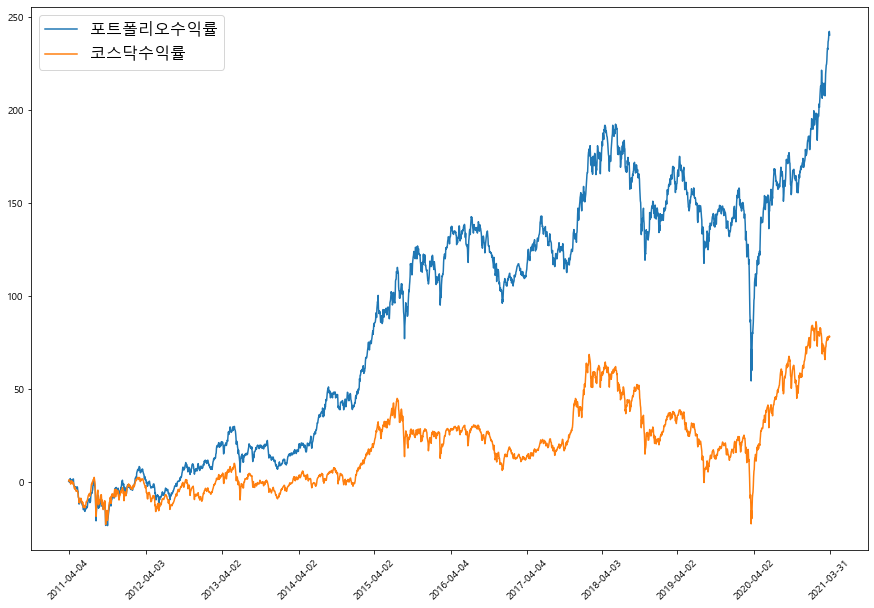

In [56]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(15,10))
plt.plot(stock_rtn_all["누적수익률(%)"],label='포트폴리오수익률')
plt.plot(stock_rtn_all["코스닥누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,249,495,741,984,1231,1478,1719,1960,2208,2452], rotation=45)


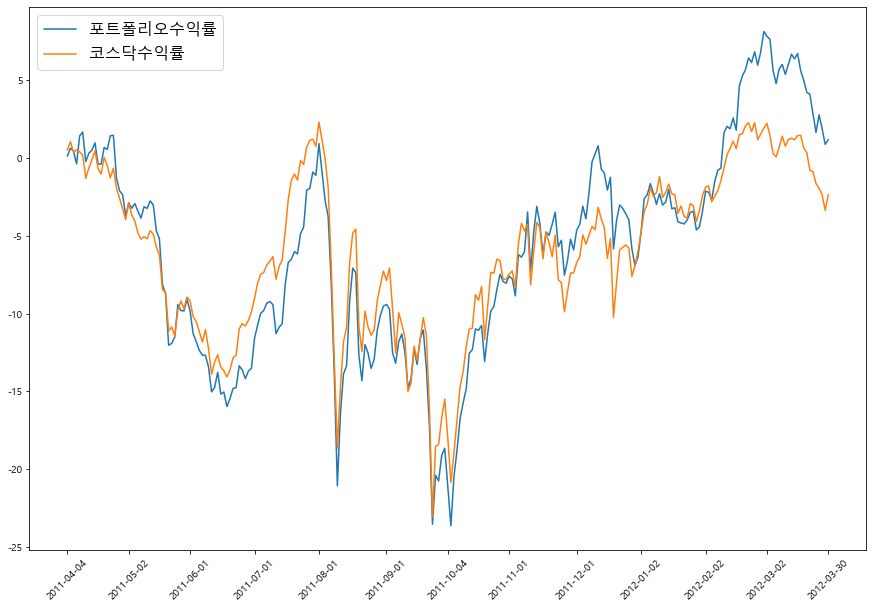

In [67]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2011["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2011["코스닥연누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,20,40,61,82,104,124,144,166,187,208,228,248], rotation=45)

plt.show()

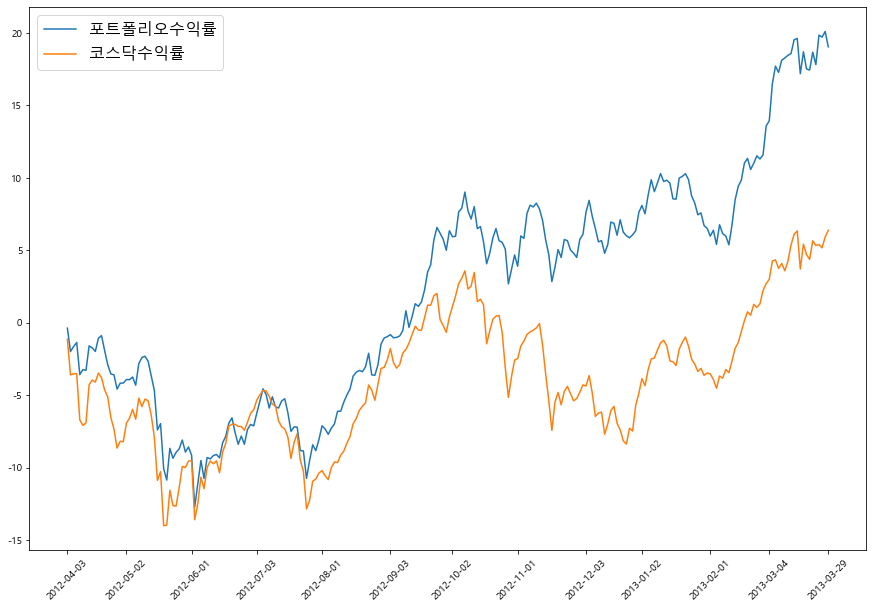

In [68]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2012["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2012["코스닥연누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,19,40,61,82,104,124,145,167,185,207,226,245], rotation=45)

plt.show()

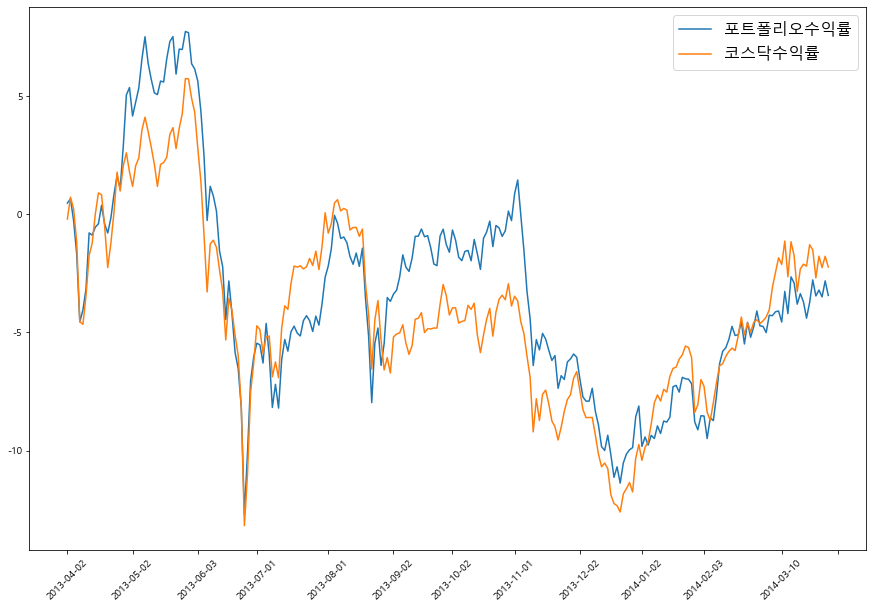

In [69]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2013["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2013["코스닥연누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,21,42,61,84,105,124,144,165,185,205,230,248], rotation=45)

plt.show()

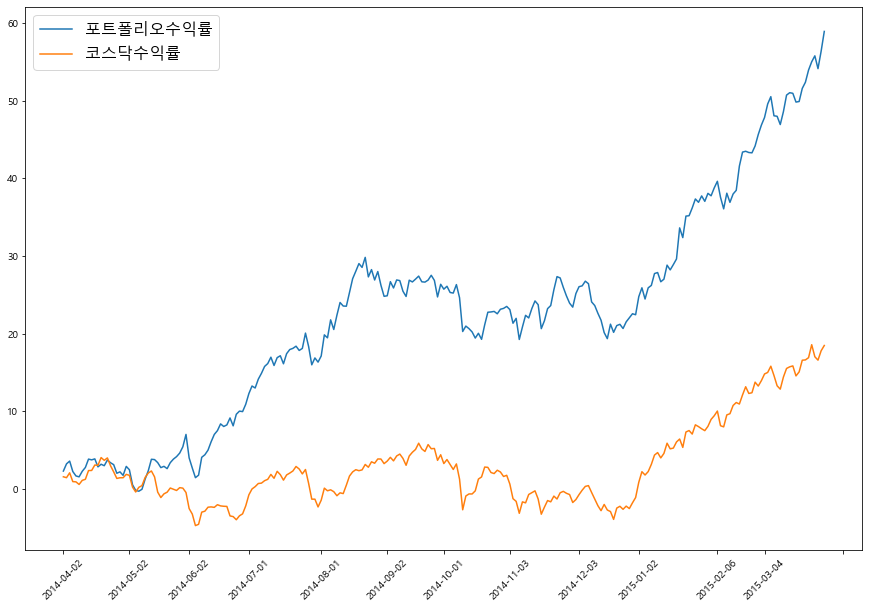

In [70]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2014["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2014["코스닥연누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,21,40,59,82,103,121,142,164,183,208,223,248], rotation=45)

plt.show()

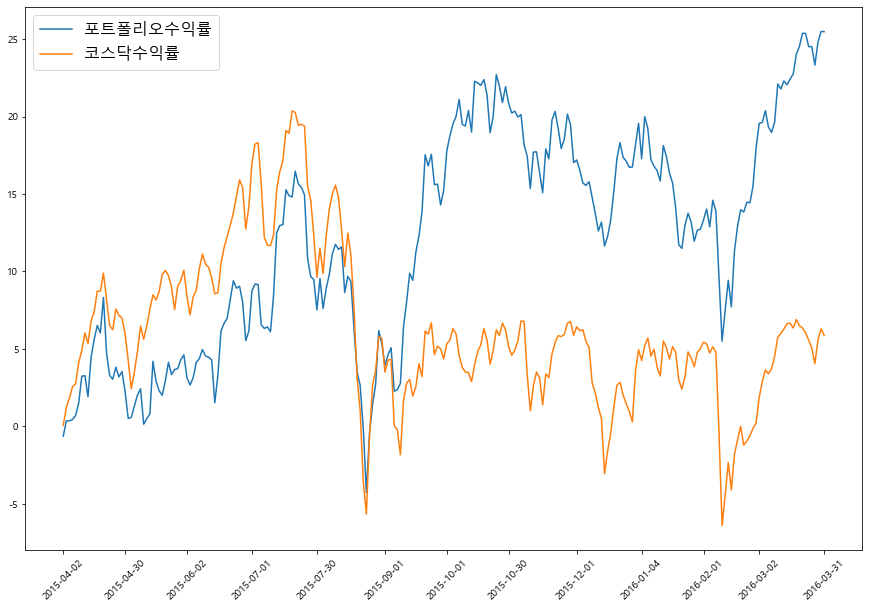

In [71]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2015["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2015["코스닥연누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,20,40,61,82,104,124,144,166,187,207,225,246], rotation=45)

plt.show()

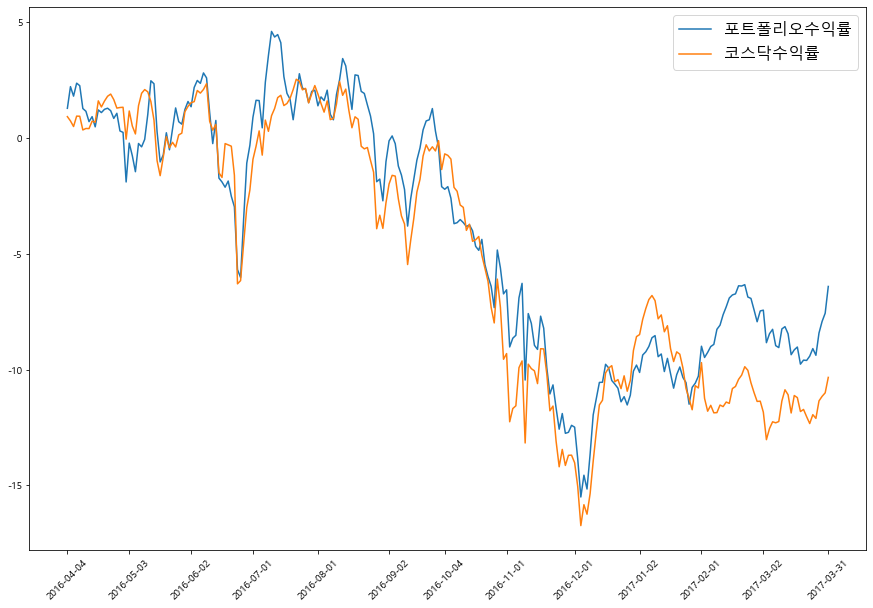

In [72]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2016["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2016["코스닥연누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,20,40,60,81,104,122,142,164,185,205,225,246], rotation=45)

plt.show()

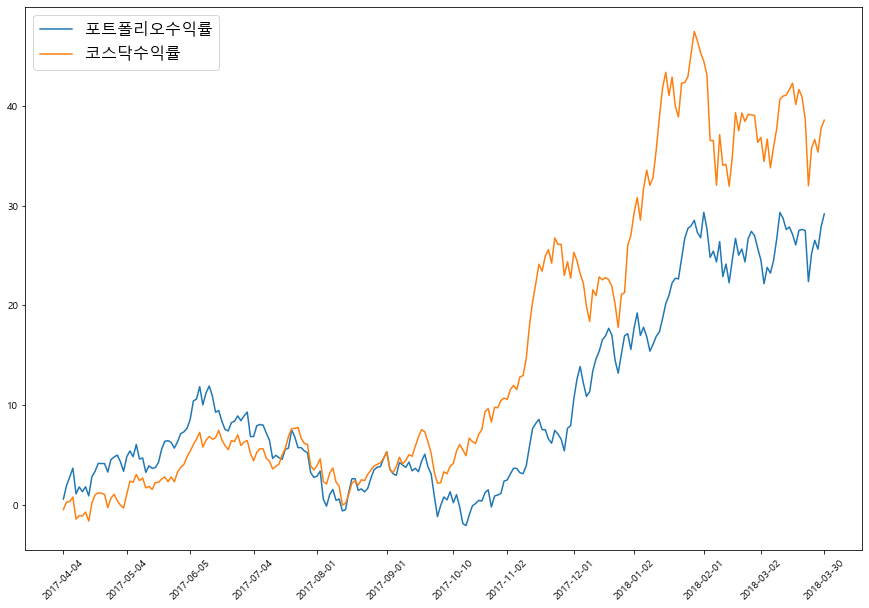

In [73]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2017["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2017["코스닥연누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,20,40,60,80,102,123,140,161,180,202,220,240], rotation=45)

plt.show()

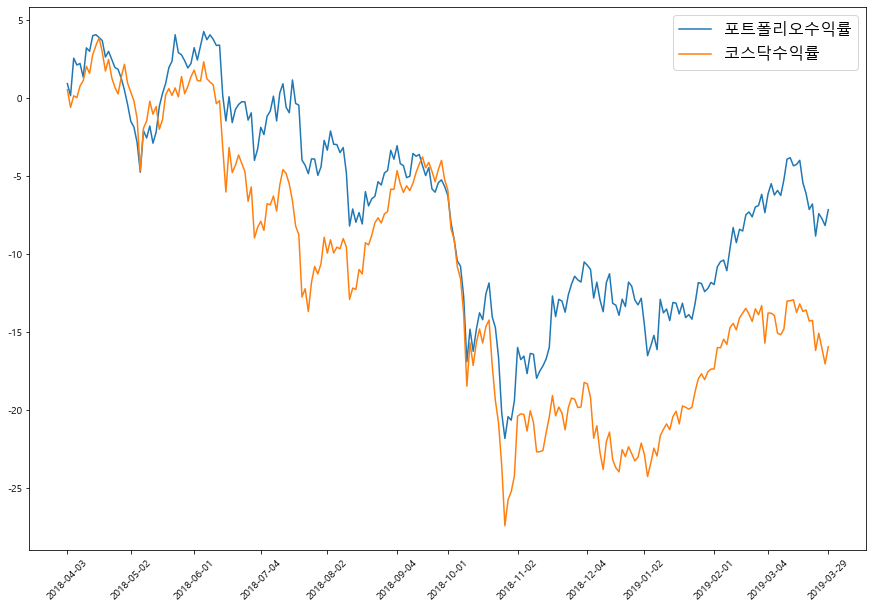

In [74]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2018["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2018["코스닥연누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,20,40,61,82,104,120,142,164,182,204,221,240], rotation=45)

plt.show()

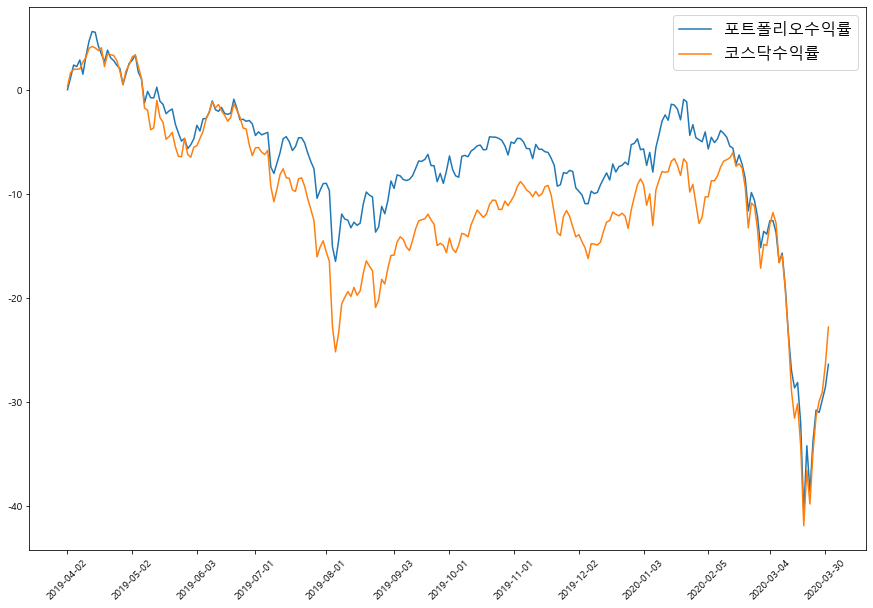

In [75]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2019["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2019["코스닥연누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,21,42,61,84,106,124,145,166,187,208,228,246], rotation=45)

plt.show()

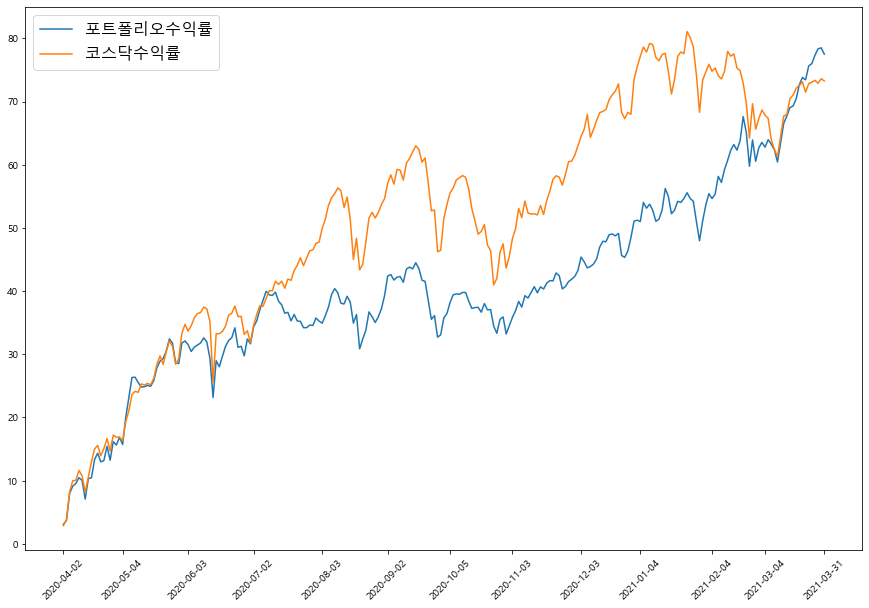

In [76]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2020["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2020["코스닥연누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,19,40,61,83,104,124,144,166,185,208,225,244], rotation=45)

plt.show()